<a href="https://colab.research.google.com/github/VoTanThinh/XULYANH/blob/main/FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/FOOD/Train',target_size=(200,200), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/AI/FOOD/Validation',target_size=(200,200 ), batch_size=32, class_mode='categorical')
training_set.class_indices
test_set.class_indices

Found 3006 images belonging to 10 classes.
Found 360 images belonging to 10 classes.


{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [3]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(200,200,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(512,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))


#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(512,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [4]:
# Biên dịch 
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs=20, batch_size=256 ,verbose=1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc) 
print('hàm mất mát trên tập kiểm ta', test_loss) 

Epoch 1/20
94/94 [==============================] - 688s 7s/step - loss: 2.1380 - accuracy: 0.2315
Epoch 2/20
94/94 [==============================] - 382s 4s/step - loss: 1.6492 - accuracy: 0.4255
Epoch 3/20
94/94 [==============================] - 383s 4s/step - loss: 1.4849 - accuracy: 0.4963
Epoch 4/20
94/94 [==============================] - 378s 4s/step - loss: 1.1704 - accuracy: 0.5971
Epoch 5/20
94/94 [==============================] - 379s 4s/step - loss: 1.0270 - accuracy: 0.6607
Epoch 6/20
94/94 [==============================] - 378s 4s/step - loss: 0.8872 - accuracy: 0.7023
Epoch 7/20
94/94 [==============================] - 380s 4s/step - loss: 0.7402 - accuracy: 0.7432
Epoch 8/20
94/94 [==============================] - 380s 4s/step - loss: 0.6659 - accuracy: 0.7781
Epoch 9/20
94/94 [==============================] - 380s 4s/step - loss: 0.5124 - accuracy: 0.8200
Epoch 10/20
94/94 [==============================] - 380s 4s/step - loss: 0.4601 - accuracy: 0.8486
Epoch 11/

In [5]:
#Lưu
from keras.models import load_model
model.save("FoodVN.h5")
model_1=load_model('FoodVN.h5')

In [6]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']                                                           # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 93ms/step
Banh pia


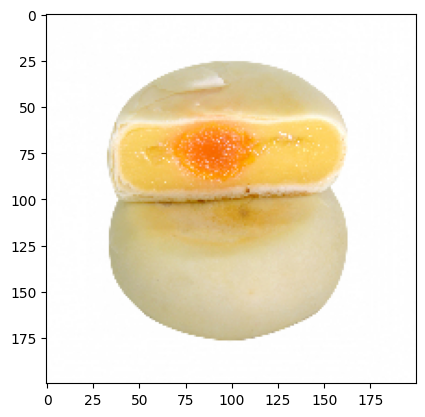

1/1 [==============================] - 0s 85ms/step
Ca  kho to


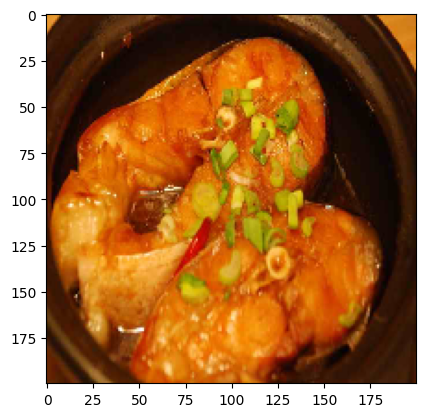

1/1 [==============================] - 0s 52ms/step
Banh pia


1/1 [==============================] - 0s 51ms/step
Ca  kho to


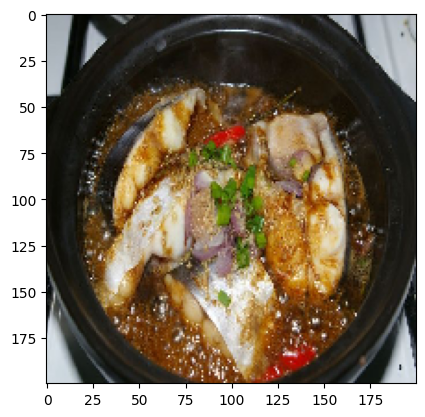

1/1 [==============================] - 0s 54ms/step
Nem


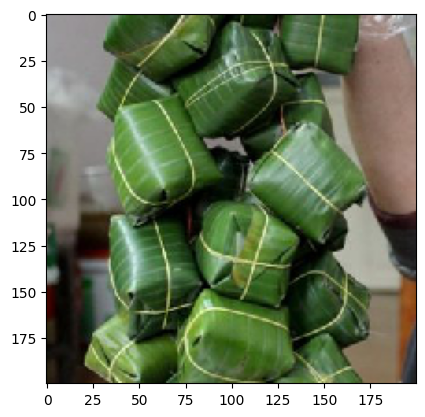

1/1 [==============================] - 0s 51ms/step
Banh cuon


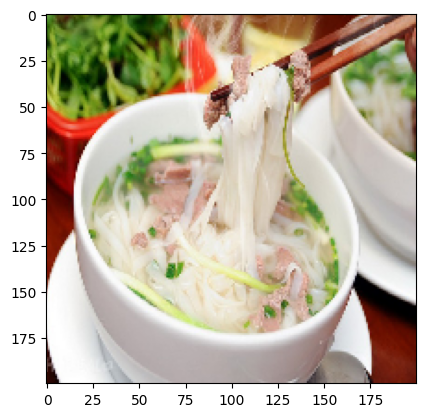

1/1 [==============================] - 0s 53ms/step
Com tam


1/1 [==============================] - 0s 51ms/step
Com tam


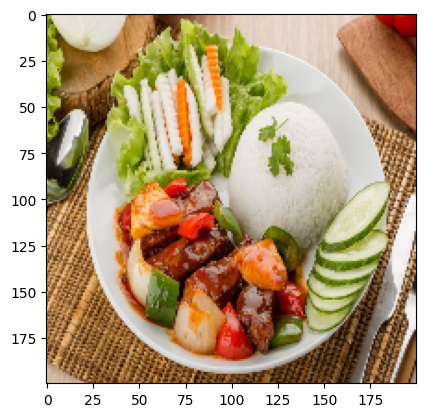

1/1 [==============================] - 0s 52ms/step
Bun dau mam tom


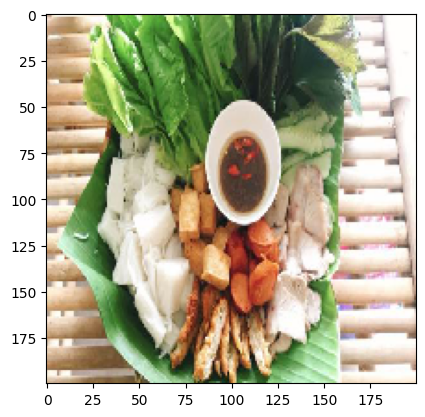

1/1 [==============================] - 0s 54ms/step
Banh cuon


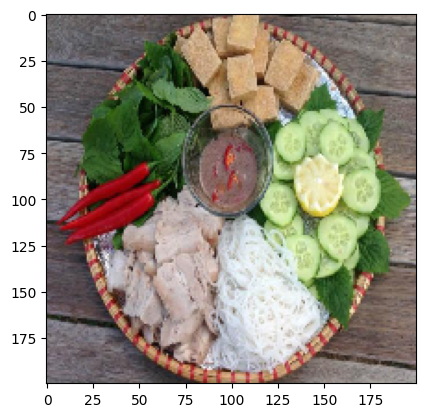

1/1 [==============================] - 0s 50ms/step
Pho


1/1 [==============================] - 0s 64ms/step
Banh xeo


1/1 [==============================] - 0s 51ms/step
Banh tet


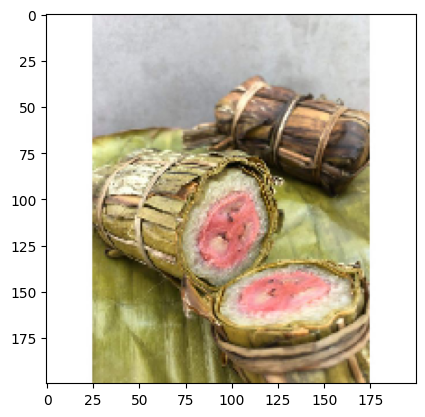

1/1 [==============================] - 0s 51ms/step
Banh xeo


1/1 [==============================] - 0s 51ms/step
Banh tet


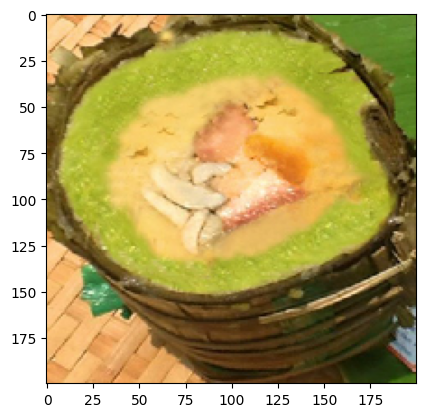

1/1 [==============================] - 0s 50ms/step
Banh cuon


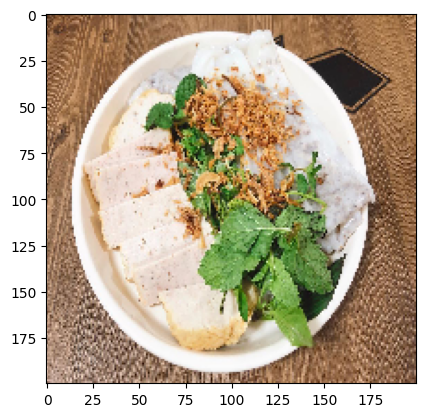

1/1 [==============================] - 0s 53ms/step
Banh xeo


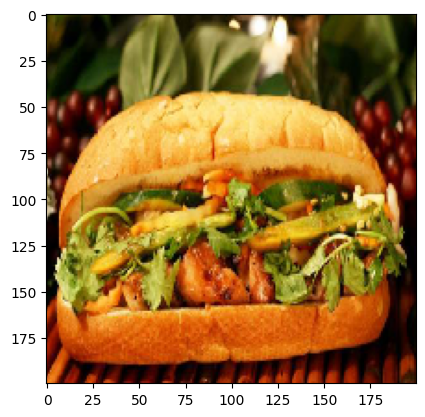

1/1 [==============================] - 0s 55ms/step
Banh mi


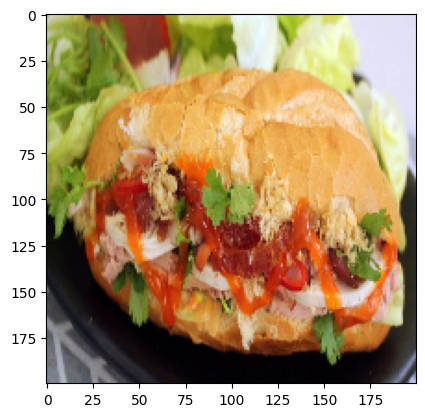

1/1 [==============================] - 0s 50ms/step
Nem


1/1 [==============================] - 0s 50ms/step
Banh cuon


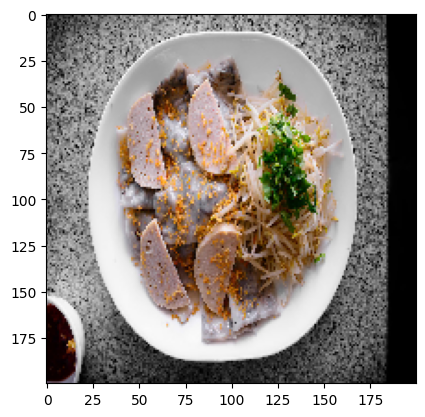

In [15]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/AI/FOOD/Test/Test1'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(200,200))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Banh cuon','Banh mi','Banh pia','Banh tet', 'Banh xeo','Bun dau mam tom','Ca  kho to','Com tam','Nem','Pho']
  print(class_name[result]) 
  plt.show()